### Journey Cost Prediction Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pymongo
from pymongo import MongoClient

In [3]:
client = pymongo.MongoClient("mongodb://localhost:27017")

In [4]:
db = client['big_data']

In [5]:
mycollection = db['journey_cost']

In [2]:
df = pd.read_csv("_nhai_toll_info_new1_2022_12_19__202212191452.csv")
df.head()

,Date Scrapped,Plaza Name,TollPlazaID,Distance,Type of vehicle,Single Journey,Return Journey,Monthly Pass,Commercial Vehicle Registered within the district of plaza
0,2022-12-19,Badava ( Public Funded ),4486,36,Car/Jeep/Van,65.0,100.0,2235.0,35.0
1,2022-12-19,Badava ( Public Funded ),4486,36,LCV,110.0,165.0,3615.0,55.0
2,2022-12-19,Badava ( Public Funded ),4486,36,Bus/Truck,225.0,340.0,7570.0,115.0
3,2022-12-19,Badava ( Public Funded ),4486,36,Upto 3 Axle Vehicle,250.0,370.0,8260.0,125.0
4,2022-12-19,Badava ( Public Funded ),4486,36,4 to 6 Axle,355.0,535.0,11875.0,180.0


In [3]:
df.shape

(431, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 9 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Date Scrapped                                               431 non-null    object 
 1   Plaza Name                                                  431 non-null    object 
 2   TollPlazaID                                                 431 non-null    int64  
 3   Distance                                                    431 non-null    int64  
 4   Type of vehicle                                             431 non-null    object 
 5   Single Journey                                              431 non-null    float64
 6   Return Journey                                              431 non-null    float64
 7   Monthly Pass                                                424 non-null    float64
 8   C

### Missing values

In [5]:
df.isnull().sum()

Date Scrapped                                                  0
Plaza Name                                                     0
TollPlazaID                                                    0
Distance                                                       0
Type of vehicle                                                0
Single Journey                                                 0
Return Journey                                                 0
Monthly Pass                                                   7
Commercial Vehicle Registered within the district of plaza    70
dtype: int64

In [6]:
df["Commercial Vehicle Registered within the district of plaza"].isnull().sum()/len(df["Commercial Vehicle Registered within the district of plaza"])

0.16241299303944315

In [7]:
df["Commercial Vehicle Registered within the district of plaza"].fillna(df["Commercial Vehicle Registered within the district of plaza"].mean(), inplace=True)

In [8]:
df.isnull().sum()

Date Scrapped                                                 0
Plaza Name                                                    0
TollPlazaID                                                   0
Distance                                                      0
Type of vehicle                                               0
Single Journey                                                0
Return Journey                                                0
Monthly Pass                                                  7
Commercial Vehicle Registered within the district of plaza    0
dtype: int64

In [9]:
df["Monthly Pass"] = df["Monthly Pass"].fillna(df["Monthly Pass"].mean())

In [10]:
df.isnull().sum()

Date Scrapped                                                 0
Plaza Name                                                    0
TollPlazaID                                                   0
Distance                                                      0
Type of vehicle                                               0
Single Journey                                                0
Return Journey                                                0
Monthly Pass                                                  0
Commercial Vehicle Registered within the district of plaza    0
dtype: int64

### Analysing the type of numerical variables

In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Number of numerical variables: ", len(numerical_features))

Number of numerical variables:  6


In [12]:
numerical_features

['TollPlazaID',
 'Distance',
 'Single Journey',
 'Return Journey',
 'Monthly Pass',
 'Commercial Vehicle Registered within the district of plaza']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 9 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Date Scrapped                                               431 non-null    object 
 1   Plaza Name                                                  431 non-null    object 
 2   TollPlazaID                                                 431 non-null    int64  
 3   Distance                                                    431 non-null    int64  
 4   Type of vehicle                                             431 non-null    object 
 5   Single Journey                                              431 non-null    float64
 6   Return Journey                                              431 non-null    float64
 7   Monthly Pass                                                431 non-null    float64
 8   C

In [14]:
df.drop(["Date Scrapped"],axis=1, inplace=True)

In [15]:
df["Plaza Name"].value_counts()

 Main Toll (Panchvati colony) (Sheela Nagar) ( Public Funded )     14
 Badava ( Public Funded )                                           7
 Bhagalpur ( Public Funded )                                        7
 Manderdisa ( Public Funded )                                       7
 Madanpur ( Public Funded )                                         7
                                                                   ..
 Yerradoddi ( Public Funded )                                       7
 Tanguturu ( BOT (Toll) )                                           7
 Balachera ( Public Funded )                                        7
 Toda ( Public Funded )                                             7
 Patancheru (Prograssive Construction Toll) (MoRTH) ( BOT )         4
Name: Plaza Name, Length: 61, dtype: int64

In [16]:
df["Type of vehicle"].value_counts()

Car/Jeep/Van           62
LCV                    62
Bus/Truck              62
Upto 3 Axle Vehicle    62
4 to 6 Axle            61
HCM/EME                61
7 or more Axle         61
Name: Type of vehicle, dtype: int64

In [17]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_features)))

Discrete Variables Count: 0


In [18]:
discrete_features

[]

In [19]:
continous_features = [feature for feature in numerical_features if feature not in discrete_features]
print("Continuous feature Count are {}".format(len(continous_features)))

Continuous feature Count are 6


In [20]:
continous_features

['TollPlazaID',
 'Distance',
 'Single Journey',
 'Return Journey',
 'Monthly Pass',
 'Commercial Vehicle Registered within the district of plaza']

In [21]:
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
print("Number of categorical variables: ", len(categorical_features))

Number of categorical variables:  2


In [22]:
categorical_features

['Plaza Name', 'Type of vehicle']

In [23]:
for feature in categorical_features:
    print(feature,":",len(df[feature].unique()),"labels")

Plaza Name : 61 labels
Type of vehicle : 7 labels


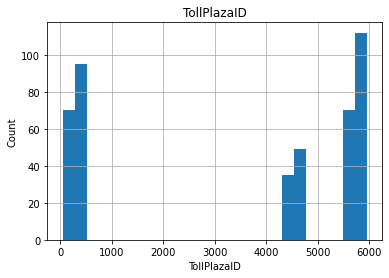

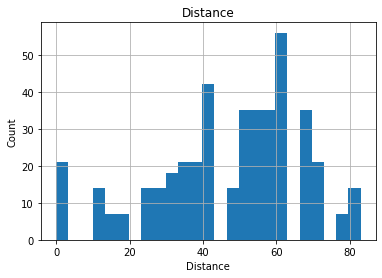

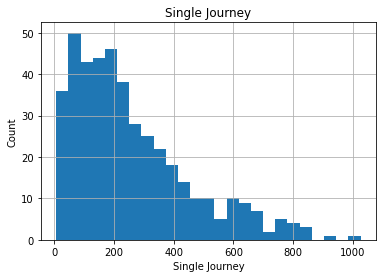

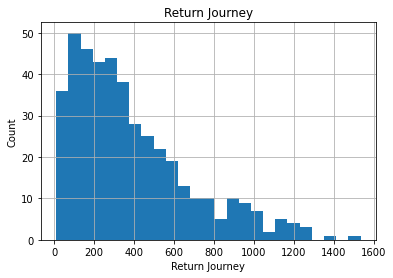

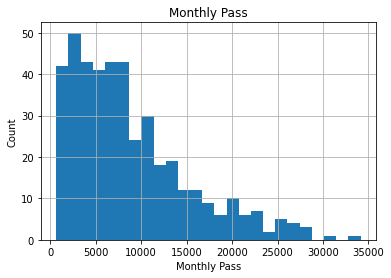

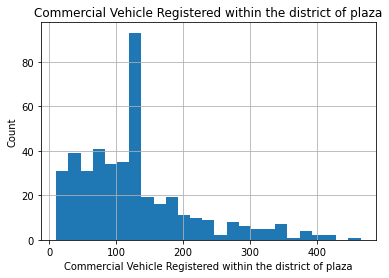

In [24]:
for feature in continous_features:
    data = df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Predicting the Single Journey Rate with Categorical Variables

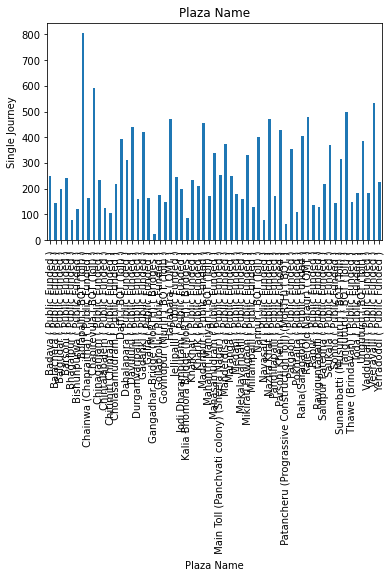

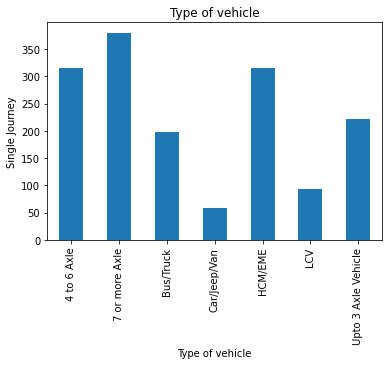

In [25]:
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['Single Journey'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Single Journey')
    plt.title(feature)
    plt.show()

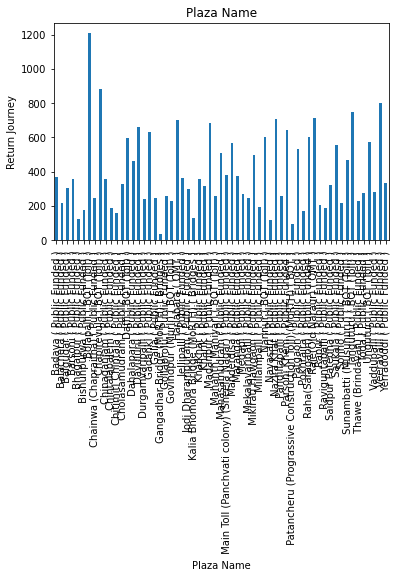

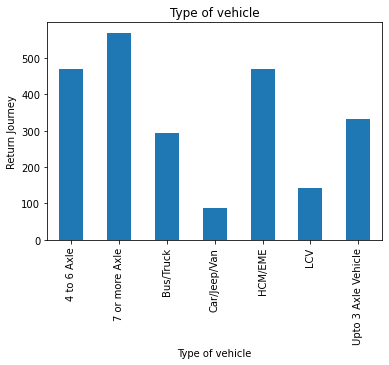

In [26]:
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['Return Journey'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Return Journey')
    plt.title(feature)
    plt.show()

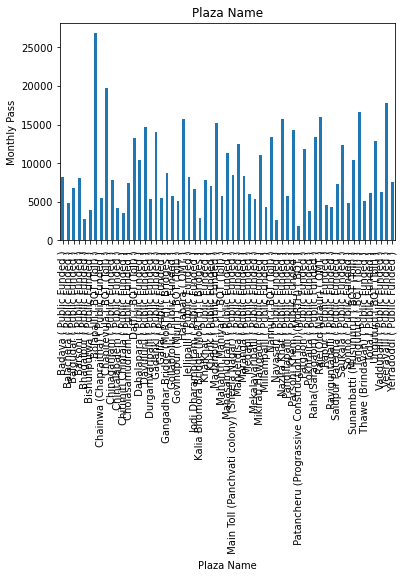

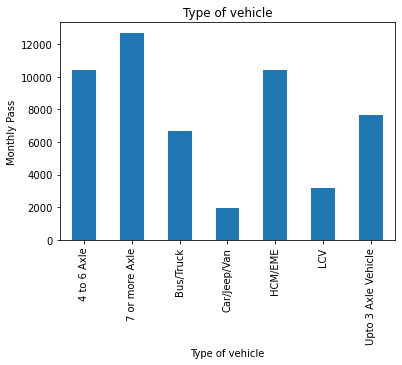

In [27]:
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['Monthly Pass'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Monthly Pass')
    plt.title(feature)
    plt.show()

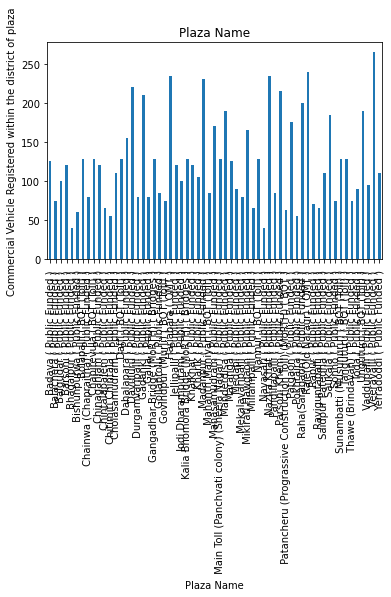

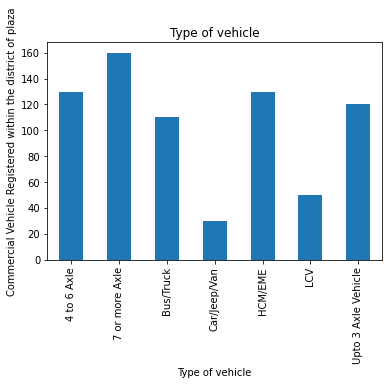

In [28]:
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['Commercial Vehicle Registered within the district of plaza'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Commercial Vehicle Registered within the district of plaza')
    plt.title(feature)
    plt.show()

In [29]:
df.drop('Plaza Name',axis=1,inplace=True)

In [30]:
df.drop('TollPlazaID',axis=1,inplace=True)

In [31]:
df.head()

,Distance,Type of vehicle,Single Journey,Return Journey,Monthly Pass,Commercial Vehicle Registered within the district of plaza
0,36,Car/Jeep/Van,65.0,100.0,2235.0,35.0
1,36,LCV,110.0,165.0,3615.0,55.0
2,36,Bus/Truck,225.0,340.0,7570.0,115.0
3,36,Upto 3 Axle Vehicle,250.0,370.0,8260.0,125.0
4,36,4 to 6 Axle,355.0,535.0,11875.0,180.0


In [32]:
df["Type of vehicle"] = df["Type of vehicle"].map({"Car/Jeep/Van":1,"LCV":2,"Bus/Truck":3,"Upto 3 Axle Vehicle":4,"HCM/EME":5,"4 to 6 Axle":6,"7 or more axle": 7})
df.head()

,Distance,Type of vehicle,Single Journey,Return Journey,Monthly Pass,Commercial Vehicle Registered within the district of plaza
0,36,1.0,65.0,100.0,2235.0,35.0
1,36,2.0,110.0,165.0,3615.0,55.0
2,36,3.0,225.0,340.0,7570.0,115.0
3,36,4.0,250.0,370.0,8260.0,125.0
4,36,6.0,355.0,535.0,11875.0,180.0


In [33]:
df["Type of vehicle"] = df["Type of vehicle"].fillna(np.round(df["Type of vehicle"].mean(),0))

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Distance                                                    431 non-null    int64  
 1   Type of vehicle                                             431 non-null    float64
 2   Single Journey                                              431 non-null    float64
 3   Return Journey                                              431 non-null    float64
 4   Monthly Pass                                                431 non-null    float64
 5   Commercial Vehicle Registered within the district of plaza  431 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 20.3 KB


### Check for outlier detection

In [35]:
for i in df.columns:
    print("Column name is {}".format(i))
    print("Upper limit: ",df[i].mean()+3*df[i].std())
    print("Lower limit: ",df[i].mean()-3*df[i].std())

Column name is Distance
Upper limit:  106.67725704843829
Lower limit:  -12.097210644725983
Column name is Type of vehicle
Upper limit:  8.194132106323902
Lower limit:  -1.3542249137484959
Column name is Single Journey
Upper limit:  847.085366294172
Lower limit:  -329.21065631737383
Column name is Return Journey
Upper limit:  1270.40616384332
Lower limit:  -493.8191568827631
Column name is Monthly Pass
Upper limit:  28126.398118630306
Lower limit:  -10627.162269573704
Column name is Commercial Vehicle Registered within the district of plaza
Upper limit:  385.89357605587264
Lower limit:  -130.33678935227164


In [36]:
df[(df['Distance']>106.67725704843832) | (df['Distance']<-12.097210644726012)]

,Distance,Type of vehicle,Single Journey,Return Journey,Monthly Pass,Commercial Vehicle Registered within the district of plaza


In [37]:
df[(df['Type of vehicle']>8.19413210632390) | (df['Type of vehicle']<-1.3542249137484959)]

,Distance,Type of vehicle,Single Journey,Return Journey,Monthly Pass,Commercial Vehicle Registered within the district of plaza


In [38]:
df[(df['Single Journey']>847.0853662941716) | (df['Single Journey']<-329.2106563173735)]

,Distance,Type of vehicle,Single Journey,Return Journey,Monthly Pass,Commercial Vehicle Registered within the district of plaza
13,70,3.0,1025.0,1535.0,34125.0,127.778393
220,69,3.0,935.0,1400.0,31105.0,465.000000


In [39]:
df[(df['Return Journey']>1270.4061638433195) | (df['Return Journey']<-493.81915688276274)]

,Distance,Type of vehicle,Single Journey,Return Journey,Monthly Pass,Commercial Vehicle Registered within the district of plaza
13,70,3.0,1025.0,1535.0,34125.0,127.778393
220,69,3.0,935.0,1400.0,31105.0,465.000000


In [40]:
df[(df['Monthly Pass']>28126.398118630317) | (df['Monthly Pass']<-10627.162269573713)]

,Distance,Type of vehicle,Single Journey,Return Journey,Monthly Pass,Commercial Vehicle Registered within the district of plaza
13,70,3.0,1025.0,1535.0,34125.0,127.778393
220,69,3.0,935.0,1400.0,31105.0,465.000000


In [41]:
df[(df['Commercial Vehicle Registered within the district of plaza']>385.8935760558726) | (df['Commercial Vehicle Registered within the district of plaza']<-130.33678935227147)]

,Distance,Type of vehicle,Single Journey,Return Journey,Monthly Pass,Commercial Vehicle Registered within the district of plaza
220,69,3.0,935.0,1400.0,31105.0,465.0
248,79,3.0,800.0,1200.0,26630.0,400.0
276,40,3.0,825.0,1240.0,27515.0,415.0
339,83,3.0,825.0,1235.0,27475.0,410.0
409,50,3.0,835.0,1255.0,27885.0,420.0


Thus, we can see the Return Journey, Monthly Pass, Commercial Vehicle Registered within the district of plaza have outliers

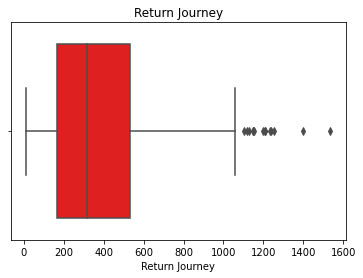

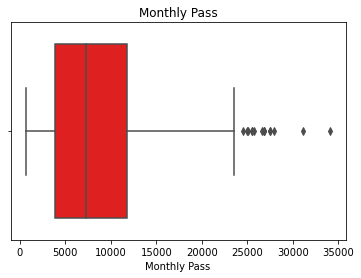

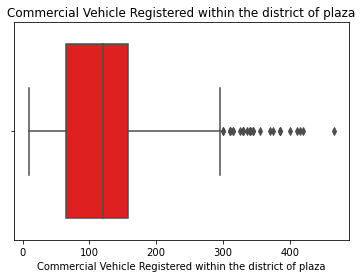

In [42]:
lst1 = df[["Return Journey","Monthly Pass","Commercial Vehicle Registered within the district of plaza"]]
for i in lst1:
    plt.title(i)
    sns.boxplot(x = df[i],color='red')
    plt.show()

In [43]:
### To remove outliers let us perform log transformation
df["Return Journey"] = np.log(df["Return Journey"])
df["Monthly Pass"] = np.log(df["Monthly Pass"])
df["Commercial Vehicle Registered within the district of plaza"] = np.log(df["Commercial Vehicle Registered within the district of plaza"])

In [44]:
df[(df['Return Journey']>1270.4061638433195) | (df['Return Journey']<-493.81915688276274)]

,Distance,Type of vehicle,Single Journey,Return Journey,Monthly Pass,Commercial Vehicle Registered within the district of plaza


In [45]:
df[(df['Monthly Pass']>28126.398118630317) | (df['Monthly Pass']<-10627.162269573713)]

,Distance,Type of vehicle,Single Journey,Return Journey,Monthly Pass,Commercial Vehicle Registered within the district of plaza


In [46]:
df[(df['Commercial Vehicle Registered within the district of plaza']>385.8935760558726) | (df['Commercial Vehicle Registered within the district of plaza']<-130.33678935227147)]

,Distance,Type of vehicle,Single Journey,Return Journey,Monthly Pass,Commercial Vehicle Registered within the district of plaza


Thus, we have successfully removed outliers.

### Train Test Split

In [47]:
X = df[["Distance","Type of vehicle"]]
y = df["Single Journey"]

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [51]:
y_pred = regressor.predict(X_test)

In [52]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.5197770704236666

### Let us perform Hyper parameter tuning

In [53]:
### Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
random_grid = {
                'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf
            }
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [54]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [55]:
y_pred_1=rf_random.predict(X_test)

In [56]:
r2_score(y_test,y_pred_1)

0.5391927942964606

In [57]:
### MSE, MAE, RMSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred_1))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred_1))
print("Root Mean Squared Error: ",sqrt(mean_squared_error(y_test,y_pred_1)))

Mean Absolute Error:  90.58524883386659
Mean Squared Error:  15612.475059437345
Root Mean Squared Error:  124.94989019377866


### Saving the model

In [58]:
import pickle as pkl
pkl.dump(rf_random,open('journey_model.pkl','wb'))

In [59]:
pkl.load(open('journey_model.pkl','rb'))

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

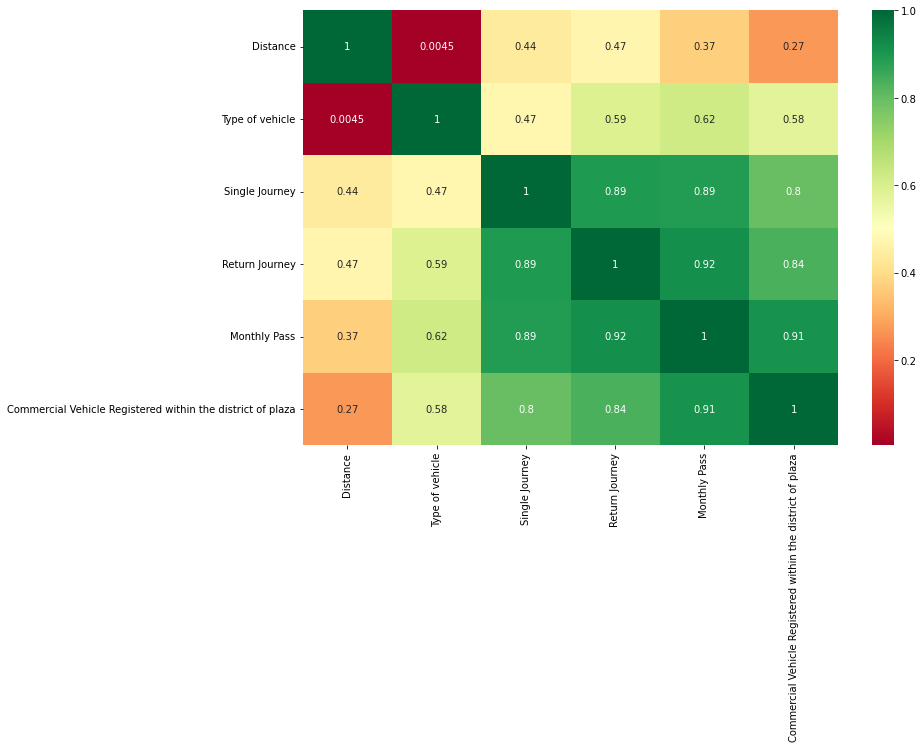

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()